# EXAMEN 1 MOD2 REGRESIÓN LINEAL

## Importar

In [1]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

In [2]:
## Conocer encoding de csv
liga = '/home/ef/Documents/Diplomado/EXAMEN02/'
import chardet
with open(liga + 'train_PAY_AMT3.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
df = pd.read_csv(liga + 'train_PAY_AMT3.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
df.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2508,25104,70000.0,2,2,2,38,0,0,0,24619.0,25107.0,25634.0,26143.0,898.0,931.0,936.0,970.0
3419,18934,140000.0,2,2,1,32,0,0,0,133779.0,135943.0,111264.0,111785.0,5000.0,5000.0,4500.0,4500.0
2369,26147,60000.0,2,2,2,31,0,0,0,59626.0,55775.0,28187.0,28978.0,2300.0,1200.0,1200.0,1500.0
970,1421,80000.0,2,1,2,29,0,-2,-1,4136.0,0.0,0.0,150.0,0.0,0.0,150.0,419.0


In [4]:
dim_antes = len(df)
df = df.iloc[:,1:].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   SEX        5625 non-null   int64  
 2   EDUCATION  5625 non-null   int64  
 3   MARRIAGE   5625 non-null   int64  
 4   AGE        5625 non-null   int64  
 5   PAY_4      5625 non-null   int64  
 6   PAY_5      5625 non-null   int64  
 7   PAY_6      5625 non-null   int64  
 8   BILL_AMT3  5625 non-null   float64
 9   BILL_AMT4  5625 non-null   float64
 10  BILL_AMT5  5625 non-null   float64
 11  BILL_AMT6  5625 non-null   float64
 12  PAY_AMT3   5625 non-null   float64
 13  PAY_AMT4   5625 non-null   float64
 14  PAY_AMT5   5625 non-null   float64
 15  PAY_AMT6   5625 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 703.2 KB


In [5]:
cat = list(df.columns[1:8])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5625 non-null   object
 1   EDUCATION  5625 non-null   object
 2   MARRIAGE   5625 non-null   object
 3   PAY_4      5625 non-null   object
 4   PAY_5      5625 non-null   object
 5   PAY_6      5625 non-null   object
dtypes: object(6)
memory usage: 263.8+ KB


In [6]:
num = [col for col in df.columns if col not in cat]
df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   AGE        5625 non-null   int64  
 2   BILL_AMT3  5625 non-null   float64
 3   BILL_AMT4  5625 non-null   float64
 4   BILL_AMT5  5625 non-null   float64
 5   BILL_AMT6  5625 non-null   float64
 6   PAY_AMT3   5625 non-null   float64
 7   PAY_AMT4   5625 non-null   float64
 8   PAY_AMT5   5625 non-null   float64
 9   PAY_AMT6   5625 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 439.6 KB


In [7]:
pay = [col for col in df.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in df.columns if col.startswith('BILL')]

## Análisis exploratorio

### Categóricas

In [8]:
## Reemplazar por NaN
dict_replace = {'0':np.nan,
                '5':np.nan,
                '6':np.nan}
df['EDUCATION'] = df['EDUCATION'].replace(dict_replace).copy()

df['MARRIAGE'] = df['MARRIAGE'].replace(dict_replace).copy()

df[cat].isnull().sum() / len(df)

SEX          0.000000
EDUCATION    0.010667
MARRIAGE     0.001956
PAY_4        0.000000
PAY_5        0.000000
PAY_6        0.000000
dtype: float64

In [9]:
## Se omiten ausentes
df.dropna(inplace = True)
len(df) / dim_antes

0.9873777777777778

### Numéricas

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>],
       [<AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>],
       [<AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

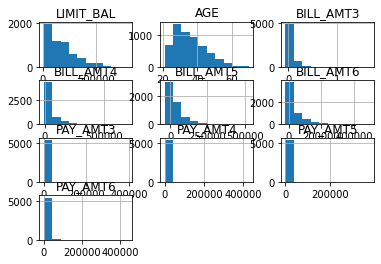

In [10]:
df[num].hist()

In [11]:
len(df) / dim_antes

0.9873777777777778

## Ingeniería de variables

### Numéricas

In [12]:
## Promedio de todos los montos de pago
df['Prom_monto'] = df[monto].mean(axis = 1)
num += ['Prom_monto']
df['Prom_monto'].describe()

count      5554.000000
mean      42506.552710
std       62986.167311
min      -14204.250000
25%        3359.000000
50%       18432.750000
75%       52029.375000
max      565044.500000
Name: Prom_monto, dtype: float64

In [13]:
## Dimensión hasta ahora
df.shape

(5554, 17)

In [14]:
df.reset_index(drop = True, inplace = True)

### Categóricas

In [15]:
for col in estatus:
    aux = []
    for i in range(len(df)):
        if int(df[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(df[col][i])
    df[col] = aux

for col in estatus:
    display(df[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_4
1,-1,0.196255
2,-2,0.146381
0,0,0.545013
3,>=1,0.112351


,index,PAY_5
1,-1,0.184192
2,-2,0.154123
0,0,0.570760
3,>=1,0.090925


,index,PAY_6
1,-1,0.195535
2,-2,0.165826
0,0,0.540151
3,>=1,0.098488


In [16]:
[x for x in df.columns if x not in cat + num]

[]

In [17]:
## Se define la variable objetivo
tgt = ['PAY_AMT3']
num = [x for x in num if x not in tgt]
[x for x in df.columns if x not in cat + num]

['PAY_AMT3']

In [18]:
for col in cat[:3]:
    df[col] = df[col].astype(int)
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5554 entries, 0 to 5553
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5554 non-null   object
 1   EDUCATION  5554 non-null   object
 2   MARRIAGE   5554 non-null   object
 3   PAY_4      5554 non-null   object
 4   PAY_5      5554 non-null   object
 5   PAY_6      5554 non-null   object
dtypes: object(6)
memory usage: 260.5+ KB


## Modelaje

In [19]:
X = pd.get_dummies(df[cat]).join(df[num])
y = df[tgt]
y.describe()

,PAY_AMT3
count,5554.000000
mean,5325.640619
std,16311.347401
min,0.000000
25%,361.250000
50%,1700.000000
75%,4705.500000
max,397092.000000


In [20]:
X.shape

(5554, 31)

### Reducción de dimensiones

In [21]:
# Se eligirán las mejores variables
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(k = 31, score_func = f_regression)
kb.fit(X, y)

ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
X[ls_best].describe()

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
count,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5.554000e+03,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000
mean,0.388909,0.611091,0.369644,0.463450,0.161505,0.005402,0.450486,0.539971,0.009543,0.196255,0.146381,0.545013,0.112351,0.184192,0.154123,0.570760,0.090925,0.195535,0.165826,0.540151,0.098488,169601.670868,35.396111,4.704572e+04,43401.088405,40543.888189,39035.514944,4825.793482,4656.699676,5454.285380,42506.552710
std,0.487546,0.487546,0.482752,0.498707,0.368029,0.073303,0.497587,0.498445,0.097228,0.397199,0.353520,0.498015,0.315827,0.387675,0.361099,0.495012,0.287529,0.396647,0.371958,0.498430,0.298000,129500.614297,9.136642,7.381636e+04,65753.617507,62126.432600,59911.174705,15415.165694,13779.204647,19152.893606,62986.167311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-6.150600e+04,-10938.000000,-37594.000000,-21295.000000,0.000000,0.000000,0.000000,-14204.250000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60000.000000,28.000000,2.400000e+03,2096.750000,1610.500000,1164.750000,285.000000,201.000000,88.750000,3359.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,145000.000000,34.000000,1.918500e+04,18481.000000,17150.000000,16170.000000,1500.000000,1500.000000,1500.000000,18432.750000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,240000.000000,41.000000,5.922825e+04,53711.750000,50061.000000,49065.750000,4000.000000,4000.000000,4000.000000,52029.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,800000.000000,70.000000,1.664089e+06,706864.000000,530672.000000,498316.000000,432130.000000,379267.000000,443001.000000,565044.500000


<AxesSubplot:>

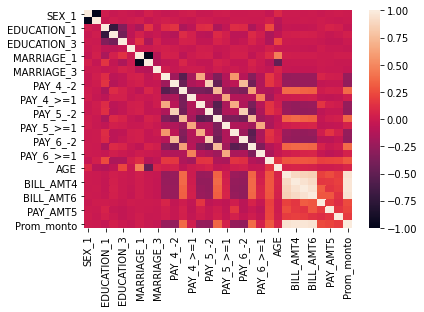

In [22]:
import seaborn as sns
sns.heatmap(X[ls_best].corr())

In [23]:
## Y modificamos la matriz X con las mejores variables
X = X[ls_best].copy()

### Escalamiento

In [24]:
## Se separan los conjuntos de entrenamiento y prueba
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 22)
len(y_test) / len(y_train)

0.11124449779911964

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm_x = MinMaxScaler()
mm_y = MinMaxScaler()

## En train se ajusta y transforma
X = pd.DataFrame(mm_x.fit_transform(X_train),
                 columns = X.columns)
y = mm_y.fit_transform(y_train)

## Y en test sólo se transforma
X_test_mm = pd.DataFrame(mm_x.transform(X_test),
                         columns = X.columns)
y_test_mm = mm_y.transform(y_test)

X.describe()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,0.388155,0.611845,0.366347,0.463786,0.164266,0.005602,0.44898,0.540816,0.010204,0.198079,0.146859,0.541216,0.113846,0.182873,0.155462,0.570828,0.090836,0.194078,0.167667,0.540616,0.097639,0.202349,0.294546,0.062896,0.075554,0.137459,0.120917,0.011251,0.012369,0.012770,0.097859
std,0.487379,0.487379,0.481854,0.498737,0.370554,0.074646,0.49744,0.498381,0.100509,0.398592,0.354000,0.498348,0.317655,0.386601,0.362381,0.495007,0.287405,0.395529,0.373608,0.498397,0.296856,0.163763,0.186912,0.042947,0.091290,0.108872,0.119363,0.036444,0.037295,0.043994,0.108342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063291,0.142857,0.037034,0.018129,0.069002,0.044959,0.000660,0.000538,0.000143,0.030288
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.170886,0.265306,0.046811,0.041012,0.096511,0.075335,0.003471,0.003955,0.003555,0.056470
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.291139,0.408163,0.069967,0.089989,0.154530,0.141788,0.009256,0.010547,0.009479,0.114496
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Entrenamiento

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(X, y)
ridge_res = cross_val_score(estimator = ridge,
                         X = X,
                         y = y,
                         cv = 3,
                         n_jobs = -1,
                         scoring = "r2")

np.mean(ridge_res), np.std(ridge_res)

(0.23986669065162583, 0.06809637231293285)

### Hiper-parametrización

In [27]:
from sklearn.linear_model import ElasticNet

## Se crea un DF para almacenar scores con diferentes parámetros
df_res = pd.DataFrame(columns=["alpha", "l1_ratio", "score", "std"])
contador = 0
for i in range(0, 100, 10):
    for j in range(10):
        elasnet_h = ElasticNet(alpha=i, l1_ratio=j/10)
        elasnet_h.fit(X, y)
        ls_res = cross_val_score(estimator = elasnet_h, 
                                 X = X, 
                                 y = y, 
                                 cv = 3, 
                                 n_jobs = -1,
                                 scoring = "r2")
        df_res.loc[contador, "alpha"] = i
        df_res.loc[contador, "l1_ratio"] = j
        df_res.loc[contador, "score"] = np.mean(ls_res)
        df_res.loc[contador, "std"] = np.std(ls_res)
        contador += 1

## Se ordena dicho DF
df_res = df_res.sort_values(by = 'score',
                            ascending = False).copy().head(5)

## Se guardan los parámetros del mejor score
alphas = df_res.iloc[0,0]
l1_ratios = df_res.iloc[0,1]

<ipython-input-27-6d628a40b7e8>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.713222984039492, tolerance: 0.0008325936760773317
  model = cd_fast.enet_coordinate_descent(
<ipython-input-27-6d628a40b7e8>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/sit

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.160644020484794, tolerance: 0.0008325936760773317
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.161221836713498, tolerance: 0.0008325936760773317
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.161569565844911, tolerance: 0.0008325936760773317
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomad

In [28]:
## Y se ejecuta
elasnet_h = ElasticNet(alpha = alphas,
                     l1_ratio = l1_ratios)
elasnet_h.fit(X, y)
el_h_res = cross_val_score(estimator = elasnet_h,
                           X = X,
                           y = y,
                           cv = 3,
                           n_jobs = -1,
                           scoring = "r2")

np.mean(el_h_res), np.std(el_h_res)

<ipython-input-28-7404d29844e2>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.713222984039492, tolerance: 0.0008325936760773317
  model = cd_fast.enet_coordinate_descent(


(0.04209075531309429, 0.37677015178541423)

### Prueba

In [29]:
pd.DataFrame(X).sample()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
646,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.025316,0.346939,0.035643,0.015238,0.066156,0.042647,0.0,0.0,0.0,0.024522


In [30]:
## Y se corre para el conjunto de prueba
from sklearn.metrics import r2_score
'{:,.2%}'.format(r2_score(y_pred = ridge.predict(X_test_mm),
                          y_true = y_test_mm))

'30.95%'

In [31]:
## Y se corre para el conjunto de prueba
from sklearn.metrics import r2_score
'{:,.2%}'.format(r2_score(y_pred = elasnet_h.predict(X_test_mm),
                          y_true = y_test_mm))

'38.13%'

In [32]:
import pickle

## Guardar modelo
with open('PAY_3.pkl', 'wb') as file:
    pickle.dump(elasnet_h, file)

## Abrir un modelo
with open('PAY_3.pkl', 'rb') as file:
    pay_3 = pickle.load(file)

## Listo para usarse
pay_3

ElasticNet(alpha=0, l1_ratio=0)

In [33]:
'{:,.2%}'.format(r2_score(y_pred = pay_3.predict(X_test_mm),
                          y_true = y_test_mm))

'38.13%'

## Validación

In [32]:
val = pd.read_csv(liga + 'val_PAY_AMT3.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
val.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_4,PAY_5,PAY_6,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT3
796,6065,210000.0,2,2,2,49,-1,0,0,65825.0,60803.0,56578.0,1420.0,1132.0,5000.0,4056.0
1551,21022,200000.0,2,1,2,28,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,510.0,0.0
1790,16752,250000.0,1,1,2,33,-1,-1,-1,1540.0,3088.0,5680.0,3088.0,3000.0,0.0,81.0
760,21275,30000.0,1,1,1,32,0,0,0,29838.0,29651.0,1567.0,593.0,31.0,0.0,30031.0


In [33]:
cat = list(val.columns[2:9])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    val[col] = val[col].astype(str)
val[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        1875 non-null   object
 1   EDUCATION  1875 non-null   object
 2   MARRIAGE   1875 non-null   object
 3   PAY_4      1875 non-null   object
 4   PAY_5      1875 non-null   object
 5   PAY_6      1875 non-null   object
dtypes: object(6)
memory usage: 88.0+ KB


In [34]:
## Ya no existe PAY_AMT1 ni 2  ni 3
num = [col for col in val.columns if col not in cat + ['CUSTOMER_ID']]
val[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  1875 non-null   float64
 1   AGE        1875 non-null   int64  
 2   BILL_AMT4  1875 non-null   float64
 3   BILL_AMT5  1875 non-null   float64
 4   BILL_AMT6  1875 non-null   float64
 5   PAY_AMT4   1875 non-null   float64
 6   PAY_AMT5   1875 non-null   float64
 7   PAY_AMT6   1875 non-null   float64
 8   BILL_AMT3  1875 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 132.0 KB


In [35]:
## Ya existen los conjuntos, pero no está de más redefinirlos
pay = [col for col in df.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in df.columns if col.startswith('BILL')]

In [36]:
## Qué columnas necesita el modelo?
pd.DataFrame(X).sample()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
384,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.253165,0.632653,0.036116,0.016506,0.168388,0.118117,0.134219,0.003955,0.004739,0.066604


Monto prom

Agrupar PAY>=1

Dummies para las categóricas

Filtrar las mejores columnas

Escalamiento

### Ingeniería de variables

In [37]:
## Promedio de todos los montos de pago
val['Prom_monto'] = val[monto].mean(axis = 1)
num += ['Prom_monto']
val['Prom_monto'].describe()

count      1875.000000
mean      41486.932267
std       58913.918399
min       -5000.000000
25%        4026.875000
50%       19172.250000
75%       50918.375000
max      496734.750000
Name: Prom_monto, dtype: float64

In [38]:
for col in estatus:
    aux = []
    for i in range(len(val)):
        if int(val[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(val[col][i])
    val[col] = aux

for col in estatus:
    display(val[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_4
1,-1,0.187200
2,-2,0.139733
0,0,0.551467
3,>=1,0.121600


,index,PAY_5
1,-1,0.181867
2,-2,0.147200
0,0,0.564800
3,>=1,0.106133


,index,PAY_6
1,-1,0.184533
2,-2,0.165867
0,0,0.530667
3,>=1,0.118933


### Reducción de dimensiones

In [39]:
modelo = pd.get_dummies(val[cat]).join(val[num])[ls_best]
modelo.describe()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.00000,1875.000000,1875.0000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.00000,1875.000000,1875.000000
mean,0.379733,0.620267,0.350400,0.470400,0.166933,0.002667,0.454933,0.531733,0.011733,0.187200,0.139733,0.551467,0.12160,0.181867,0.1472,0.564800,0.106133,0.184533,0.165867,0.530667,0.118933,163562.666667,35.469333,45181.349333,42704.385600,39908.773867,38153.220267,5141.612267,4477.24960,4953.358933,41486.932267
std,0.485450,0.485450,0.477222,0.499256,0.373016,0.051585,0.498098,0.499125,0.107712,0.390176,0.346803,0.497477,0.32691,0.385838,0.3544,0.495915,0.308090,0.388022,0.372060,0.499192,0.323796,128882.400267,9.330439,64920.485069,62000.874961,59276.776584,58098.915770,19816.492203,14336.01572,16476.055286,58913.918399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-157264.000000,-34503.000000,-5857.000000,-5048.000000,0.000000,0.00000,0.000000,-5000.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,28.000000,3251.500000,2589.500000,2031.500000,1415.000000,316.000000,157.50000,93.500000,4026.875000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,130000.000000,34.000000,19516.000000,19005.000000,18238.000000,16929.000000,1500.000000,1500.00000,1500.000000,19172.250000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,240000.000000,42.000000,54967.500000,51462.000000,50232.000000,48456.500000,4088.000000,4000.00000,4000.000000,50918.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,710000.000000,70.000000,499936.000000,505507.000000,500723.000000,511905.000000,621000.000000,317077.00000,280000.000000,496734.750000


### Escalamiento

In [40]:
modelo = pd.DataFrame(mm_x.transform(modelo), columns = modelo.columns)
modelo.describe()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.00000,1875.000000,1875.0000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,0.379733,0.620267,0.350400,0.470400,0.166933,0.002667,0.454933,0.531733,0.011733,0.187200,0.139733,0.551467,0.12160,0.181867,0.1472,0.564800,0.106133,0.184533,0.165867,0.530667,0.118933,0.194383,0.295293,0.061826,0.074731,0.136385,0.119056,0.011898,0.011805,0.011738,0.096144
std,0.485450,0.485450,0.477222,0.499256,0.373016,0.051585,0.498098,0.499125,0.107712,0.390176,0.346803,0.497477,0.32691,0.385838,0.3544,0.495915,0.308090,0.388022,0.372060,0.499192,0.323796,0.163142,0.190417,0.037622,0.086376,0.104312,0.116354,0.045858,0.037799,0.039043,0.101707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.055493,-0.032829,0.055849,0.032538,0.000000,0.000000,0.000000,0.015890
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050633,0.142857,0.037528,0.018846,0.069731,0.045481,0.000731,0.000415,0.000222,0.031474
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.151899,0.265306,0.046953,0.041715,0.098250,0.076551,0.003471,0.003955,0.003555,0.057620
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.291139,0.428571,0.067498,0.086932,0.154551,0.139690,0.009460,0.010547,0.009479,0.112426
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.886076,1.000000,0.325361,0.719481,0.947298,1.067833,1.437068,0.836026,0.663507,0.882072


### Predicción

In [41]:
resultado = pd.DataFrame(elasnet_h.predict(modelo))
resultado = pd.DataFrame(mm_y.inverse_transform(resultado),
                         columns = ['y_hat'])
resultado = pd.DataFrame(val['CUSTOMER_ID']).join(resultado)
resultado['y_hat'].describe()

count      1875.000000
mean       5339.954320
std        9918.242840
min      -24763.440133
25%         918.391498
50%        3115.268055
75%        7460.465493
max      156767.758010
Name: y_hat, dtype: float64

In [42]:
df['PAY_AMT3'].describe() , pd.DataFrame(y_test).describe()

(count      5554.000000
 mean       5325.640619
 std       16311.347401
 min           0.000000
 25%         361.250000
 50%        1700.000000
 75%        4705.500000
 max      397092.000000
 Name: PAY_AMT3, dtype: float64,
             PAY_AMT3
 count     556.000000
 mean     5325.172662
 std     17220.386489
 min         0.000000
 25%       379.000000
 50%      1669.000000
 75%      4459.500000
 max    278006.000000)

In [43]:
## Hay predicciones negativas, se omiten
aux = []
for x in resultado['y_hat']:
    if x < 0:
        aux.append(0)
    else:
        aux.append(x)

resultado['y_hat'] = aux
resultado['y_hat'].describe()

count      1875.000000
mean       5953.972279
std        9275.281257
min           0.000000
25%         918.391498
50%        3115.268055
75%        7460.465493
max      156767.758010
Name: y_hat, dtype: float64

In [44]:
resultado.to_csv(liga + 'FloresHernandezEfrainIsmael_PAYAMT3.csv',
                 index = False)